# Hands-on Transfer Learning - Cifar10

In [1]:
import tensorflow as tf
import keras
import numpy as np

In [22]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

#BatchNormalization
#from keras.optimizers import SGD,Adam
#from keras.callbacks import ReduceLROnPlateau

from keras.datasets import cifar10
# from keras.applications import VGG19,ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications import ResNet50

In [10]:
from PIL import Image
from matplotlib import pyplot

%matplotlib inline

# Helper Function

In [11]:
def plot_model_history(model_history):
    # summarize history for accuracy
    pyplot.plot(history.history['accuracy'])
    pyplot.plot(history.history['val_accuracy'])
    pyplot.title('model accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'test'], loc='upper left')
    pyplot.show()
    
    # summarize history for loss
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('model loss')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'test'], loc='upper left')
    pyplot.show()
    

In [12]:
#helper function
def show_image(img, label="", zoom=False):
    #labelname[y_train[0,0].astype(int)]
    if not zoom:
        #pyplot.figure(figsize=(4,3))
        pyplot.subplot(330 + 1 + i)
    else:
        pyplot.figure(figsize=(6,3))
        pyplot.subplot(1,2,1)
        pyplot.grid(False)
    pyplot.xticks([])
    pyplot.yticks([])
    #pyplot.imshow(img, cmap=pyplot.cm.binary)
    pyplot.xlabel('{code} - {label}'.format(code=label, label=labelname[label]))
    pyplot.imshow(img, cmap=pyplot.cm.binary)

#helper function
def show_image_prediction(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  pyplot.grid(False)
  pyplot.xticks([])
  pyplot.yticks([])
  
  pyplot.imshow(img, cmap=pyplot.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
    
  if predicted_label == true_label:
    color = 'blue'
   
  else:
    color = 'red'
  
  pyplot.xlabel("{} {:2.0f}% ({})".format(labelname[predicted_label],
                                100*np.max(predictions_array),
                                labelname[true_label[0]]),
                                color=color)

def show_value_prediction(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  pyplot.grid(False)
  pyplot.xticks([])
  pyplot.yticks([])
  thisplot = pyplot.bar(range(10), predictions_array, color="#777777")
  pyplot.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
   
  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')

# Data Preaparation

In [13]:
(train_img, train_label), (test_img, test_label) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [14]:
#Split training data into training and validation
from sklearn.model_selection import train_test_split

train_img,val_img,train_label,val_label=train_test_split(train_img,train_label,test_size=.3)

In [15]:
#Print the dimensions of the datasets to make sure everything's OK
print('training data:', (train_img.shape,train_label.shape))
print('validation data:', (val_img.shape,val_label.shape))
print('test data:', (test_img.shape,test_label.shape))

training data: ((35000, 32, 32, 3), (35000, 1))
validation data: ((15000, 32, 32, 3), (15000, 1))
test data: ((10000, 32, 32, 3), (10000, 1))


In [17]:
# Change label to one-hot-encoding
num_classes = 10
train_label_one_hot= tf.keras.utils.to_categorical(train_label, num_classes)
val_label_one_hot= tf.keras.utils.to_categorical(val_label, num_classes)
test_label_one_hot= tf.keras.utils.to_categorical(test_label, num_classes)


In [18]:
#integer to float
train_img_f = train_img.astype('float32')
val_img_f = val_img.astype('float32')
test_img_f = test_img.astype('float32')
train_img_f /= 255
val_img_f /= 255
test_img_f /= 255

In [19]:
#Print the dimensions of the datasets to make sure everything's OK
print('training data:', (train_img_f.shape,train_label_one_hot.shape))
print('validation data:', (val_img_f.shape,val_label_one_hot.shape))
print('test data:', (test_img_f.shape,test_label_one_hot.shape))

training data: ((35000, 32, 32, 3), (35000, 10))
validation data: ((15000, 32, 32, 3), (15000, 10))
test data: ((10000, 32, 32, 3), (10000, 10))


In [20]:
lrr= ReduceLROnPlateau(
                       monitor='val_acc', #Metric to be measured
                       factor=.01, #Factor by which learning rate will be reduced
                       patience=3,  #No. of epochs after which if there is no improvement in the val_acc, the learning rate is reduced
                       min_lr=1e-5) #The minimum learning rate 

NameError: ignored

# Create Model

In [23]:
num_classes = 10
model_vgg = VGG19(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=num_classes)

80150528/80134624 [==============================] - 0s 0us/step


In [24]:
train_label.shape[1]

1

In [25]:
model_vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [26]:
model= Sequential()
model.add(model_vgg) #Adds the base model (in this case vgg19 to model)
model.add(Flatten())

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
Total params: 20,024,384
Trainable params: 20,024,384
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Add the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model.add(Dense(128,activation=('relu')))
#model_1.add(Dropout(.2))
model.add(Dense(10,activation=('softmax'))) #This is the classification layer

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

# Training Preparation

In [31]:
learn_rate=.001

sgd= tf.keras.optimizers.SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam= tf.keras.optimizers.Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [32]:
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

# Train the Model

In [34]:
import os
import datetime
import time

batch_size= 100
epochs=3
start = time.time()
history = model.fit(train_img_f, train_label_one_hot,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(val_img_f, val_label_one_hot),
              shuffle=True)

# Save model and weights
now = datetime.datetime.now()

Epoch 1/3
350/350 [==============================] - 26s 76ms/step - loss: 0.7529 - accuracy: 0.7470 - val_loss: 0.7207 - val_accuracy: 0.7558
Epoch 2/3
350/350 [==============================] - 24s 70ms/step - loss: 0.6405 - accuracy: 0.7843 - val_loss: 0.6961 - val_accuracy: 0.7558
Epoch 3/3
350/350 [==============================] - 26s 76ms/step - loss: 0.5464 - accuracy: 0.8184 - val_loss: 0.6260 - val_accuracy: 0.7879


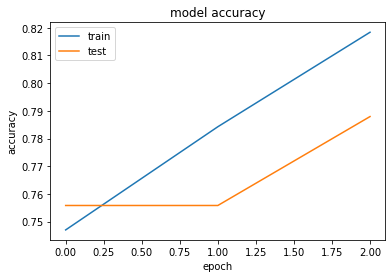

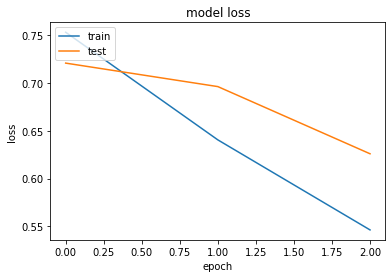

In [35]:
plot_model_history(history)

In [ ]:
## change ecpoch to 30, but this will take a long time
batch_size= 100
epochs=30
start = time.time()
history = model.fit(train_img_f, train_label_one_hot,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(val_img_f, val_label_one_hot),
              shuffle=True)

# Save model and weights
now = datetime.datetime.now()

# Evaluate Model

In [36]:
test_loss, test_acc = model.evaluate(test_img_f, test_label_one_hot)
print('Test accuracy:', test_acc)

313/313 [==============================] - 5s 13ms/step - loss: 0.6297 - accuracy: 0.7845
Test accuracy: 0.784500002861023


In [37]:
predictions = model.predict(test_img_f)

array([0.00162673, 0.00125409, 0.00298489, 0.7741781 , 0.00292682,
       0.1855158 , 0.02412003, 0.00438608, 0.00148365, 0.00152383],
      dtype=float32)

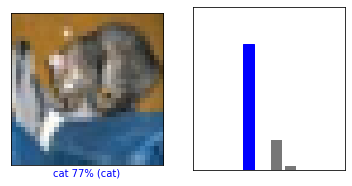

In [38]:
labelname = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
i = 0
pyplot.figure(figsize=(6,3))
pyplot.subplot(1,2,1)
show_image_prediction(i, predictions, test_label, test_img)
pyplot.subplot(1,2,2)
show_value_prediction(i, predictions, test_label)
predictions[i]

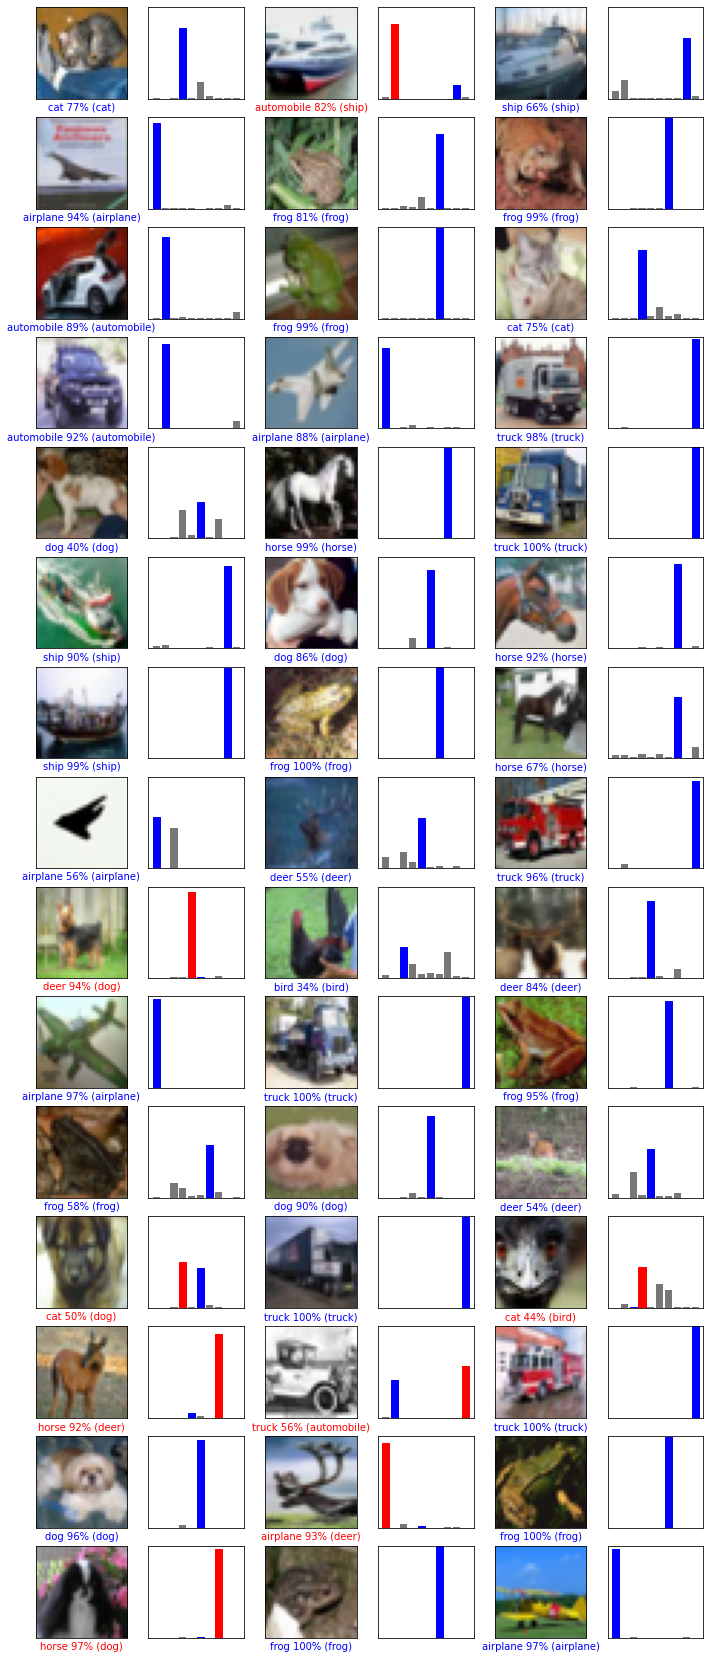

In [39]:
num_rows = 15
num_cols = 3
num_images = num_rows*num_cols
pyplot.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  pyplot.subplot(num_rows, 2*num_cols, 2*i+1)
  show_image_prediction(i, predictions, test_label, test_img)
  pyplot.subplot(num_rows, 2*num_cols, 2*i+2)
  show_value_prediction(i, predictions, test_label)